In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
heart_data_df = pd.read_csv(r'C:\Users\HP\Desktop\DS\udemy\DL and ML Practical Tutorials - Package\New folder\heart.csv')

In [3]:
heart_data_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
heart_data_df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
heart_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


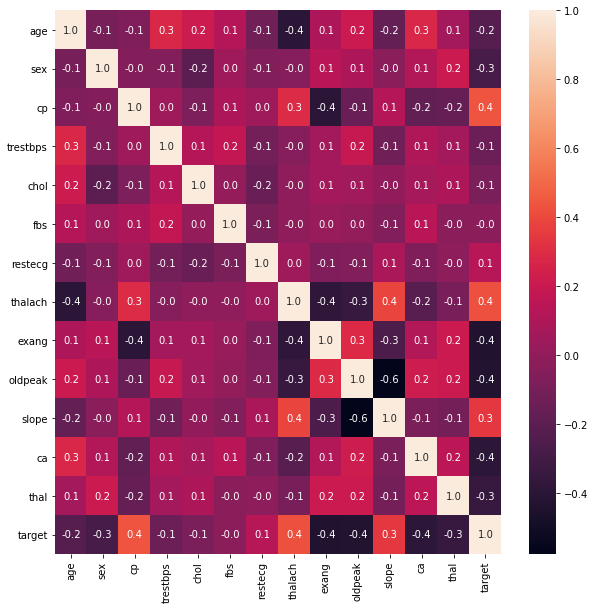

In [6]:
plt.figure(figsize = (10,10))
sns.heatmap(heart_data_df.corr(), annot = True ,fmt = '.1f')
plt.show()

In [7]:
heart_data_df.age.value_counts()[:10].values

array([19, 17, 16, 14, 13, 12, 11, 11, 11, 11], dtype=int64)

Text(0.5, 1.0, 'Age analysis')

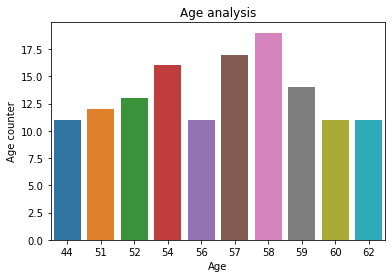

In [8]:
sns.barplot(x =heart_data_df.age.value_counts()[:10].index , y = heart_data_df.age.value_counts()[:10].values)
plt.xlabel('Age')
plt.ylabel('Age counter')
plt.title('Age analysis')

In [9]:
heart_data_df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

In [10]:
nodiseasescount = len(heart_data_df[ heart_data_df.target==0])
havediseasescount = len(heart_data_df[ heart_data_df.target==1])

In [11]:
print("parcentage of people with no diseases {:.2f}%"  .format((nodiseasescount/(len(heart_data_df.target)))*100))

parcentage of people with no diseases 45.54%


In [12]:
print("parcentage of people who have diseases {:.2f}%"  .format((havediseasescount/(len(heart_data_df.target)))*100))

parcentage of people who have diseases 54.46%


In [13]:
heart_data_df.age

0      63
1      37
2      41
3      56
4      57
       ..
298    57
299    45
300    68
301    57
302    57
Name: age, Length: 303, dtype: int64

In [14]:
fcount = len(heart_data_df[heart_data_df.sex == 0])

In [15]:
mcount = len(heart_data_df[heart_data_df.sex ==1])

In [16]:
mcount

207

In [17]:
fcount

96

In [18]:
young_age = heart_data_df[(heart_data_df.age>=29)&(heart_data_df.age <40)]
middle_age = heart_data_df[(heart_data_df.age >=40)&(heart_data_df.age <55)]
old_age = heart_data_df[(heart_data_df.age >=55)]



In [19]:
print('young_ages' , len(young_age))
print('young_ages' , len(middle_age))
print('young_ages' , len(old_age))

young_ages 16
young_ages 128
young_ages 159


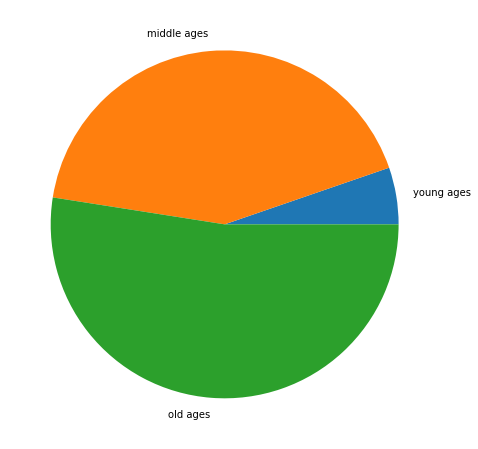

In [20]:
color = ['red','blue','green']
explode = [0.1,0.1,0.1]
plt.figure(figsize = (8,8))
plt.pie([len(young_age),len(middle_age),len(old_age)],labels = ['young ages' , 'middle ages' ,'old ages'])
plt.show()

In [24]:
heart_data_df.cp.value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

In [26]:
    heart_data_df.target.unique()

array([1, 0], dtype=int64)

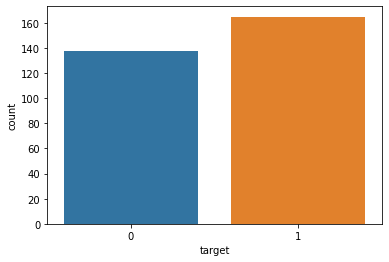

In [33]:
sns.countplot(heart_data_df.target)

In [35]:
heart_data_df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


### Model building

In [36]:
from sklearn.linear_model import LogisticRegression
x_data = heart_data_df.drop(['target'],axis =1)
y = heart_data_df.target.values

In [39]:
x_train ,x_test ,y_train , y_test = train_test_split(x_data ,y , test_size = 0.2 , random_state = 0)

#### LogisticRegression

In [43]:
lr = LogisticRegression()
lr.fit(x_train ,y_train)
print('Test accuracy {:.2f}%'.format(lr.score(x_test ,y_test)*100))

Test accuracy 85.25%


#### KNeighborsClassifier

In [49]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [53]:
print('KNN accuracy {:.2f}%'.format(kn.score(x_test,y_test)*100))

KNN accuracy 63.93%


#### SVM

In [60]:
from sklearn.svm import SVC

sv = SVC(random_state=1)
sv.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=1, shrinking=True, tol=0.001,
    verbose=False)

In [61]:
print('SVM accuracy {:.2f}%'.format(sv.score(x_test,y_test)*100) )

SVM accuracy 68.85%


#### GaussianNB

In [63]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train ,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [67]:
print('NB accuracy {:.2f}%'.format(nb.score(x_test,y_test)*100) )

NB accuracy 85.25%


#### RandomForest

In [69]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=1000)
rfc.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [70]:
print('RF accuracy {:.2f}%'.format(nb.score(x_test,y_test)*100) )

RF accuracy 85.25%
